<a href="https://colab.research.google.com/github/wesleyopenda/Abalone-Age-Prediction./blob/main/wk4_lsn2_Abalone_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WK4-lsn2** **Abalone Regression.**

In [ ]:
import pandas as pd
abalone = "/abalone.csv"

df = pd.read_csv(abalone, header = None)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.columns=["Sex", "Length","Diameter","Height", "Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"] 

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df = df.drop("Sex", axis = 1)

In [ ]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


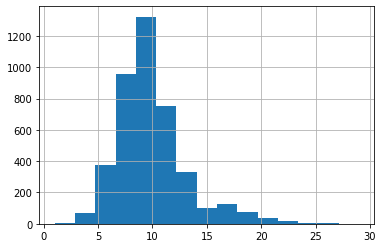

In [ ]:
# import matplotlib.pyplot as plt
df["Rings"].hist(bins = 15)

In [ ]:
# find out correlations between features and the target
correlation_matrix = df.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
# Extract data from pandas dataframe.
X = df.drop("Rings", axis = 1)
X = X.values
y = df["Rings"]
y = y.values

In [ ]:
type(X)
type(y)

numpy.ndarray

In [ ]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [ ]:
# Create a knn regression model

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Predict for training data and calculate prediction error

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(round(rmse, 2))

1.65


In [ ]:
# predict for test data and calculate prediction error
# If lower then the model can generate well
# If higher our model is overfitting.

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(round(rmse, 2))

2.38
